# Misc dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
graph = Graph_MCMC()
graph.read_from_ns("soc_net_comms/amazon")

In [9]:
vertices = graph.get_vertex_list()
prop_map = graph.get_property_map("communities")
prop_map[vertices[0]]

array([ 66521,  72203, 176408, 250066, 264904], dtype=int32)

In [5]:
#graph.convert_props_to_flags()
#graph.remove_property("Unknown")

In [6]:
graph.print_info()

Graph with N=334863 nodes, E=925872 edges and D=2 vertex features for training


In [7]:
graph.list_props()

name            (graph)   (type: string, val: soc_net_comms (amazon))
description     (graph)   (type: string, val: Snapshots of LiveJournal,
                                              Friendster, Orkut, and YouTube
                                              online social networks, as well
                                              as DBLP and Amazon. Node metadata
                                              represents a post hoc definition
                                              of a 'community' that a node
                                              belongs to, derived from topical
                                              labels of the node or interest-
                                              based 'groups' that a node links
                                              to.  Friendster is an on-line
                                              gaming network. Before re-
                                              launching as a game website,
         

In [9]:
graph.partition(B_min=18, B_max=18)

Performing inference...
Current bracket: (18, 18, 18) (6247.016337744038, 6247.016337744038, 6247.016337744038)
Current bracket: (18, 18, 18) (6247.016337744038, 6247.016337744038, 6247.016337744038)
Bisect at B = 18 with S = 6247.016337744038
Best result: B = 18, S = 6247.016337744038
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f04900697f0, at 0x7f041fa94d00>

In [10]:
graph.mcmc(num_iter=10000)

100%|██████████| 10000/10000 [00:09<00:00, 1008.28it/s]


18

Drawing soft partition


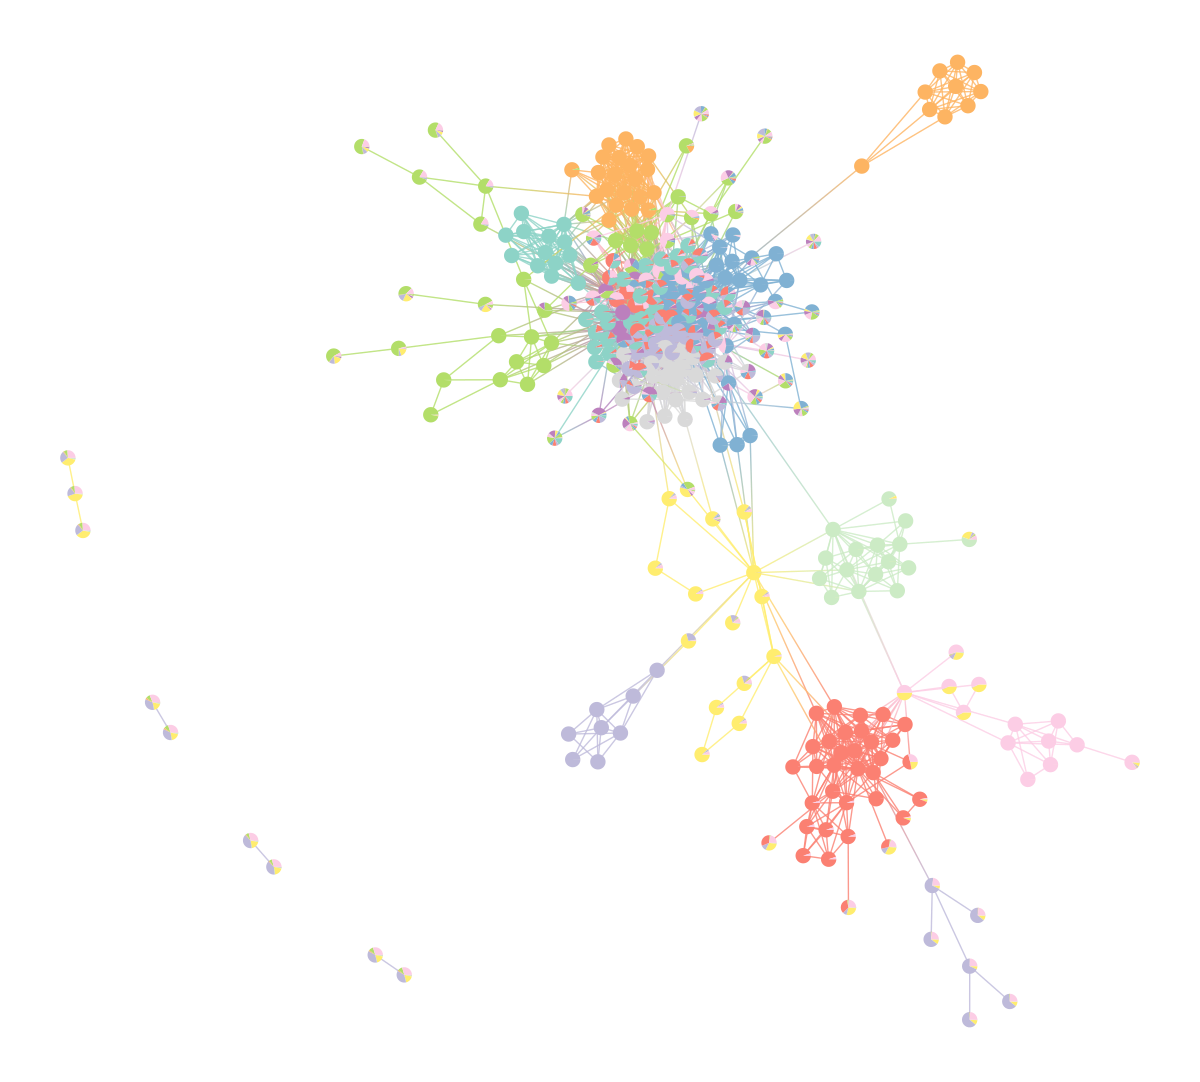

In [11]:
#graph.draw(gen_layout=False, output="school-graph.png")
graph.draw(gen_layout=False, size=7)

Drawing block adjacency matrix


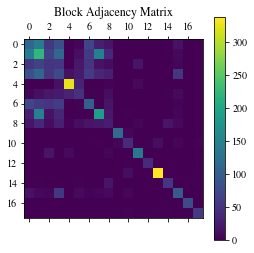

In [13]:
graph.plot_matrix()

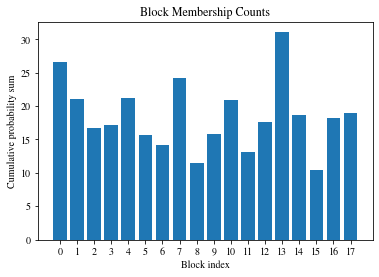

In [14]:
graph.plot_posterior_props()

## Train classifier

In [15]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

ValueError: setting an array element with a sequence.

## Interpret results

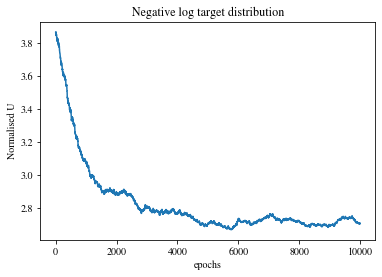

2.828405079212166

In [14]:
classifier.plot_U()

In [15]:
classifier.thin_samples(burn_in_pc=30, thinning_pc=10)

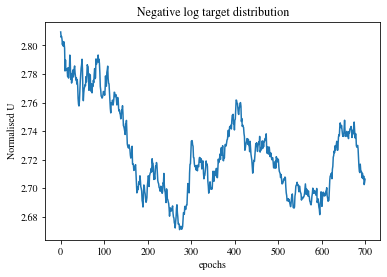

2.725997825096841


In [16]:
u_mean = classifier.plot_U()
print(u_mean)

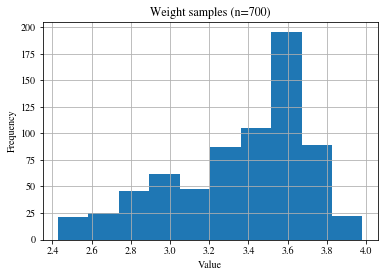

In [17]:
classifier.plot_sample_histogram()

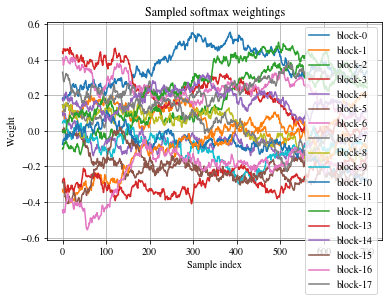

In [18]:
classifier.plot_sample_history()

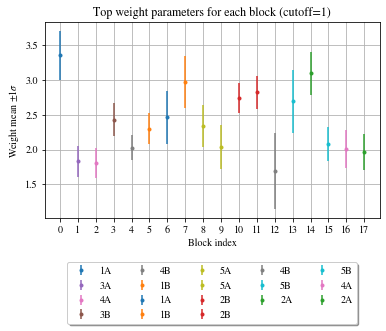

In [19]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

Discarding feature 10: Teachers
Discarding feature 11: F
Discarding feature 12: M
Discarding feature 13: bias


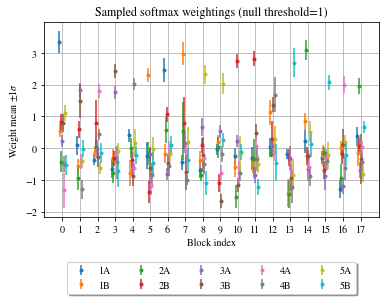

In [20]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=1, legend=True)